<a href="https://colab.research.google.com/github/simsekergun/ENEE691/blob/main/PANDAS/RelationalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Utils__

In [1]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)


class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

__Agenda__

- Merge, Join, Concat DataFrames

- Introduction to SQL -- sqlite (if time allows)

__Concats__

In [2]:
import pandas as pd

In [3]:
make_df('ABC', [1,2,3,4,5])

A   B   C
1  A1  B1  C1
2  A2  B2  C2
3  A3  B3  C3
4  A4  B4  C4
5  A5  B5  C5

In [4]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])


1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [5]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [1, 2])
display('df1', 'df2', 'pd.concat([df1, df2])')

df1
    A   B
1  A1  B1
2  A2  B2

df2
    A   B
1  A1  B1
2  A2  B2

pd.concat([df1, df2])
    A   B
1  A1  B1
2  A2  B2
1  A1  B1
2  A2  B2

In [6]:
experiment = pd.concat([df1, df2])

experiment

A   B
1  A1  B1
2  A2  B2
1  A1  B1
2  A2  B2

In [7]:
experiment.loc[1]

A   B
1  A1  B1
1  A1  B1

In [8]:


df3 = make_df('AB', [0, 1])
df4 = make_df('AD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")



df3
    A   B
0  A0  B0
1  A1  B1

df4
    A   D
0  A0  D0
1  A1  D1

pd.concat([df3, df4], axis='columns')
    A   B   A   D
0  A0  B0  A0  D0
1  A1  B1  A1  D1

__Concat:join parameter__

In [9]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')


df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [10]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

__Merge and Join__

one-to_one

In [11]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

In [12]:
df3 = pd.merge(df1, df2)
df3

employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

Many-to-one

In [13]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

Many-to-Many

In [14]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df5
         group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization

pd.merge(df1, df5)
  employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization

Left_on - Right_on

In [15]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa'],
                    'salary': [70000, 80000, 120000,]})


display('df1', 'df3', 'pd.merge(df1, df3, left_on="employee", right_on="name", how = "outer")' )

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df3
   name  salary
0   Bob   70000
1  Jake   80000
2  Lisa  120000

pd.merge(df1, df3, left_on="employee", right_on="name", how = "outer")
  employee        group  name    salary
0      Bob   Accounting   Bob   70000.0
1     Jake  Engineering  Jake   80000.0
2     Lisa  Engineering  Lisa  120000.0
3      Sue           HR   NaN       NaN

Inner-Outer

In [16]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

display('df6', 'df7', 'pd.merge(df6, df7)')


df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [17]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer

Left-Right

In [18]:
display('df6', 'df7', "pd.merge(df6, df7, how='right')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='right')
     name   food drink
0    Mary  bread  wine
1  Joseph    NaN  beer

Overlapping Columns

In [19]:


df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on = "name", suffixes = ["Limon", "Zeytin"])')



df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on = "name", suffixes = ["Limon", "Zeytin"])
   name  rankLimon  rankZeytin
0   Bob          1           3
1  Jake          2           1
2  Lisa          3           4
3   Sue          4           2

## Combining Datasets

__Read files__

Flights, airlines, airports, planes, weather data

In [20]:
flights = pd.read_csv('https://raw.githubusercontent.com/mguner/teaching/main/datasets/nyc_flights/nyc_flights.csv')
airlines = pd.read_csv('https://raw.githubusercontent.com/jayleetx/nycflights/master/data-raw/airlines.csv')
airports = pd.read_csv('https://raw.githubusercontent.com/jayleetx/nycflights/master/data-raw/airports.csv')
planes = pd.read_csv('https://raw.githubusercontent.com/jayleetx/nycflights/master/data-raw/planes.csv')
weather = pd.read_csv('https://raw.githubusercontent.com/tidyverse/nycflights13/main/data-raw/weather.csv')

In [21]:
flights.sample(3)

year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
46467   2013     10   21    2033.0            2035       -2.0    2338.0   
191177  2013      4   28    1704.0            1700        4.0    1945.0   
231946  2013      6   11    1508.0            1459        9.0    1810.0   

        sched_arr_time  arr_delay carrier  flight tailnum origin dest  \
46467             2340       -2.0      UA     374  N435UA    EWR  FLL   
191177            1955      -10.0      AA     257  N3HNAA    JFK  LAS   
231946            1758       12.0      UA     841  N596UA    JFK  LAX   

        air_time  distance  hour  minute             time_hour  
46467      156.0      1065    20      35  2013-10-22T00:00:00Z  
191177     302.0      2248    17       0  2013-04-28T21:00:00Z  
231946     319.0      2475    14      59  2013-06-11T18:00:00Z

In [22]:
airlines.head()

carrier                      name
0      AA    American Airlines Inc.
1      AS      Alaska Airlines Inc.
2      B6           JetBlue Airways
3      DL      Delta Air Lines Inc.
4      EV  ExpressJet Airlines Inc.

In [23]:
airports.head()

faa                               name        lat         lon   alt   tz  \
0  0V4  Brookneal/Campbell County Airport  37.141701  -79.016403   596 -5.0   
1  19S         Sublette Municipal Airport  37.491402 -100.830002  2908 -5.0   
2  23M              Clarke County Airport  32.084900  -88.738899   320 -6.0   
3  2A5                     Causey Airport  35.911800  -79.617599   723 -5.0   
4  2H0              Shelby County Airport  39.410400  -88.845398   618 -6.0   

  dst             tzone  
0   A  America/New_York  
1   A               NaN  
2   A   America/Chicago  
3   A  America/New_York  
4   A   America/Chicago

`airports` has the information (location, time-zone, name, etc.) of the airports.

In [24]:
planes.head()

tailnum    year                      type        manufacturer  \
0  N102AA  2007.0  Fixed wing single engine  AVIAT AIRCRAFT INC   
1  N103AA  2007.0  Fixed wing single engine  AVIAT AIRCRAFT INC   
2  N103SY  2014.0   Fixed wing multi engine         EMBRAER S A   
3  N10575  2002.0   Fixed wing multi engine             EMBRAER   
4  N105AA  1978.0  Fixed wing single engine              CESSNA   

            model  engines  seats  speed         engine  
0            A-1B        1    2.0    NaN  Reciprocating  
1            A-1B        1    2.0    NaN  Reciprocating  
2  ERJ 170-200 LR        2   88.0    NaN      Turbo-fan  
3       EMB-145LR        2   55.0    NaN      Turbo-fan  
4            R182        1    4.0  111.0  Reciprocating

`planes` dataframe contains information about the planes and their tailnumbers. 



__Weather__

In [25]:
weather.head()

origin  year  month  day  hour   temp   dewp  humid  wind_dir  wind_speed  \
0    EWR  2013      1    1     1  39.02  26.06  59.37     270.0    10.35702   
1    EWR  2013      1    1     2  39.02  26.96  61.63     250.0     8.05546   
2    EWR  2013      1    1     3  39.02  28.04  64.43     240.0    11.50780   
3    EWR  2013      1    1     4  39.92  28.04  62.21     250.0    12.65858   
4    EWR  2013      1    1     5  39.02  28.04  64.43     260.0    12.65858   

   wind_gust  precip  pressure  visib             time_hour  
0        NaN     0.0    1012.0   10.0  2013-01-01T06:00:00Z  
1        NaN     0.0    1012.3   10.0  2013-01-01T07:00:00Z  
2        NaN     0.0    1012.5   10.0  2013-01-01T08:00:00Z  
3        NaN     0.0    1012.2   10.0  2013-01-01T09:00:00Z  
4        NaN     0.0    1011.9   10.0  2013-01-01T10:00:00Z

`weather` dataframe contains weather related data for each airport in NYC.

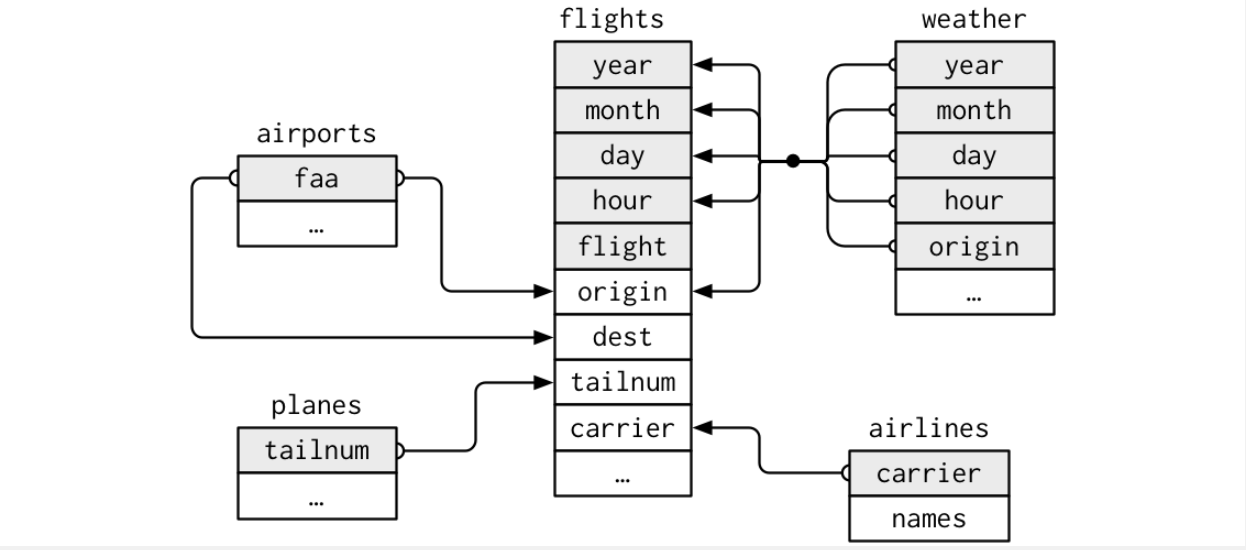

[Source: R for data science 13.2](https://r4ds.had.co.nz/relational-data.html)

__Recall__

A primary key uniquely identifies an observation in its own table.

__Recall__

A foreign key uniquely identifies an observation in another table. 

__Your Turn__

- What might be the __primary key__ of `planes` table.

- Is this 'key' a primary or foreign key for `flights` table?

__Answers__

|

# Merging Tables

In [26]:
 ## Simplyfy the flights table to see the actions of the methods

 flights2 = flights[['year', 'month', 'day', 'hour', 'origin', 'dest', 'tailnum', 'carrier']].copy()

In [27]:
flights2.head()

year  month  day  hour origin dest tailnum carrier
0  2013      1    1     5    EWR  IAH  N14228      UA
1  2013      1    1     5    LGA  IAH  N24211      UA
2  2013      1    1     5    JFK  MIA  N619AA      AA
3  2013      1    1     5    JFK  BQN  N804JB      B6
4  2013      1    1     6    LGA  ATL  N668DN      DL

__Merge `Airlines` information__

In [28]:
## Use merge method to combine airlines and flights

flights2.merge(airlines, on = 'carrier')

year  month  day  hour origin dest tailnum carrier  \
0       2013      1    1     5    EWR  IAH  N14228      UA   
1       2013      1    1     5    LGA  IAH  N24211      UA   
2       2013      1    1     5    EWR  ORD  N39463      UA   
3       2013      1    1     6    JFK  LAX  N29129      UA   
4       2013      1    1     6    EWR  SFO  N53441      UA   
...      ...    ...  ...   ...    ...  ...     ...     ...   
267517  2013      9   19    18    LGA  CLE  N760SK      OO   
267518  2013      9   20    18    LGA  CLE  N766SK      OO   
267519  2013      9   22    18    LGA  CLE  N772SK      OO   
267520  2013      9   23    18    LGA  CLE  N776SK      OO   
267521  2013      9   24    18    LGA  CLE  N785SK      OO   

                         name  
0       United Air Lines Inc.  
1       United Air Lines Inc.  
2       United Air Lines Inc.  
3       United Air Lines Inc.  
4       United Air Lines Inc.  
...                       ...  
267517  SkyWest Airlines Inc.  
267518  SkyWest Airlines Inc.  
267519  SkyWest Airlines Inc.  
267520  SkyWest Airlines Inc.  
267521  SkyWest Airlines Inc.  

[267522 rows x 9 columns]

[Pandas Merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html#pandas.DataFrame.merge)

[Pandas Join](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)

__Merging by using more than one key__

In [29]:
flights2.merge(weather, on= ['year', 'month', 'day', 'hour', 'origin'])

year  month  day  hour origin dest tailnum carrier   temp   dewp  \
0       2013      1    1     5    EWR  IAH  N14228      UA  39.02  28.04   
1       2013      1    1     5    EWR  ORD  N39463      UA  39.02  28.04   
2       2013      1    1     5    LGA  IAH  N24211      UA  39.92  24.98   
3       2013      1    1     5    JFK  MIA  N619AA      AA  39.02  26.96   
4       2013      1    1     5    JFK  BQN  N804JB      B6  39.02  26.96   
...      ...    ...  ...   ...    ...  ...     ...     ...    ...    ...   
335215  2013      9   30    22    JFK  SYR  N354JB      B6  60.98  55.94   
335216  2013      9   30    22    JFK  BUF  N281JB      B6  60.98  55.94   
335217  2013      9   30    22    JFK  ROC  N346JB      B6  60.98  55.94   
335218  2013      9   30    22    JFK  BOS  N565JB      B6  60.98  55.94   
335219  2013      9   30    23    JFK  PSE  N516JB      B6  60.08  55.04   

        humid  wind_dir  wind_speed  wind_gust  precip  pressure  visib  \
0       64.43     260.0    12.65858        NaN     0.0    1011.9   10.0   
1       64.43     260.0    12.65858        NaN     0.0    1011.9   10.0   
2       54.81     250.0    14.96014   21.86482     0.0    1011.4   10.0   
3       61.63     260.0    14.96014        NaN     0.0    1012.1   10.0   
4       61.63     260.0    14.96014        NaN     0.0    1012.1   10.0   
...       ...       ...         ...        ...     ...       ...    ...   
335215  83.47     230.0     9.20624        NaN     0.0    1016.5   10.0   
335216  83.47     230.0     9.20624        NaN     0.0    1016.5   10.0   
335217  83.47     230.0     9.20624        NaN     0.0    1016.5   10.0   
335218  83.47     230.0     9.20624        NaN     0.0    1016.5   10.0   
335219  83.41     240.0     9.20624        NaN     0.0    1016.3   10.0   

                   time_hour  
0       2013-01-01T10:00:00Z  
1       2013-01-01T10:00:00Z  
2       2013-01-01T10:00:00Z  
3       2013-01-01T10:00:00Z  
4       2013-01-01T10:00:00Z  
...                      ...  
335215  2013-10-01T02:00:00Z  
335216  2013-10-01T02:00:00Z  
335217  2013-10-01T02:00:00Z  
335218  2013-10-01T02:00:00Z  
335219  2013-10-01T03:00:00Z  

[335220 rows x 18 columns]

__Merging with `flights` and `planes`__

In [30]:
flights2.merge(planes, on = 'tailnum').head(3)

year_x  month  day  hour origin dest tailnum carrier  year_y  \
0    2013      1    1     5    EWR  IAH  N14228      UA  1999.0   
1    2013      1    8    14    EWR  MIA  N14228      UA  1999.0   
2    2013      1    9     7    EWR  BOS  N14228      UA  1999.0   

                      type manufacturer    model  engines  seats  speed  \
0  Fixed wing multi engine       BOEING  737-824        2  149.0    NaN   
1  Fixed wing multi engine       BOEING  737-824        2  149.0    NaN   
2  Fixed wing multi engine       BOEING  737-824        2  149.0    NaN   

      engine  
0  Turbo-fan  
1  Turbo-fan  
2  Turbo-fan

In [31]:
flights2.merge(planes, on = 'tailnum', suffixes=('_flights', '_planes'))

year_flights  month  day  hour origin dest tailnum carrier  \
0               2013      1    1     5    EWR  IAH  N14228      UA   
1               2013      1    8    14    EWR  MIA  N14228      UA   
2               2013      1    9     7    EWR  BOS  N14228      UA   
3               2013      1    9    11    EWR  TPA  N14228      UA   
4               2013      1   13     8    EWR  BOS  N14228      UA   
...              ...    ...  ...   ...    ...  ...     ...     ...   
206643          2013      9   19    18    LGA  CLE  N760SK      OO   
206644          2013      9   20    18    LGA  CLE  N766SK      OO   
206645          2013      9   22    18    LGA  CLE  N772SK      OO   
206646          2013      9   23    18    LGA  CLE  N776SK      OO   
206647          2013      9   28     7    EWR  SEA  N557AS      AS   

        year_planes                     type    manufacturer        model  \
0            1999.0  Fixed wing multi engine          BOEING      737-824   
1            1999.0  Fixed wing multi engine          BOEING      737-824   
2            1999.0  Fixed wing multi engine          BOEING      737-824   
3            1999.0  Fixed wing multi engine          BOEING      737-824   
4            1999.0  Fixed wing multi engine          BOEING      737-824   
...             ...                      ...             ...          ...   
206643       2005.0  Fixed wing multi engine  BOMBARDIER INC  CL-600-2C10   
206644       2005.0  Fixed wing multi engine  BOMBARDIER INC  CL-600-2C10   
206645       2005.0  Fixed wing multi engine  BOMBARDIER INC  CL-600-2C10   
206646       2006.0  Fixed wing multi engine  BOMBARDIER INC  CL-600-2C10   
206647       2006.0  Fixed wing multi engine          BOEING      737-890   

        engines  seats  speed     engine  
0             2  149.0    NaN  Turbo-fan  
1             2  149.0    NaN  Turbo-fan  
2             2  149.0    NaN  Turbo-fan  
3             2  149.0    NaN  Turbo-fan  
4             2  149.0    NaN  Turbo-fan  
...         ...    ...    ...        ...  
206643        2   80.0    NaN  Turbo-fan  
206644        2   80.0    NaN  Turbo-fan  
206645        2   80.0    NaN  Turbo-fan  
206646        2   80.0    NaN  Turbo-fan  
206647        2  149.0    NaN  Turbo-fan  

[206648 rows x 16 columns]

__Merging by using different 'keys' on each table__

In [32]:
flights2.merge(airports, left_on= 'dest', right_on = 'faa')

year  month  day  hour origin dest tailnum carrier  faa  \
0       2013      1    1     5    EWR  IAH  N14228      UA  IAH   
1       2013      1    1     5    LGA  IAH  N24211      UA  IAH   
2       2013      1    1     6    LGA  IAH  N459UA      UA  IAH   
3       2013      1    1     7    LGA  IAH  N488UA      UA  IAH   
4       2013      1    1     7    EWR  IAH  N37408      UA  IAH   
...      ...    ...  ...   ...    ...  ...     ...     ...  ...   
329169  2013      8    3    16    EWR  ANC  N572UA      UA  ANC   
329170  2013      8   10    16    EWR  ANC  N559UA      UA  ANC   
329171  2013      8   17    16    EWR  ANC  N528UA      UA  ANC   
329172  2013      8   24    16    EWR  ANC  N534UA      UA  ANC   
329173  2013      7   27     1    EWR  LGA     NaN      US  LGA   

                                                name        lat         lon  \
0       George Bush Intercontinental Houston Airport  29.984400  -95.341400   
1       George Bush Intercontinental Houston Airport  29.984400  -95.341400   
2       George Bush Intercontinental Houston Airport  29.984400  -95.341400   
3       George Bush Intercontinental Houston Airport  29.984400  -95.341400   
4       George Bush Intercontinental Houston Airport  29.984400  -95.341400   
...                                              ...        ...         ...   
329169   Ted Stevens Anchorage International Airport  61.174400 -149.996002   
329170   Ted Stevens Anchorage International Airport  61.174400 -149.996002   
329171   Ted Stevens Anchorage International Airport  61.174400 -149.996002   
329172   Ted Stevens Anchorage International Airport  61.174400 -149.996002   
329173                            La Guardia Airport  40.777199  -73.872597   

        alt   tz dst              tzone  
0        97 -6.0   A    America/Chicago  
1        97 -6.0   A    America/Chicago  
2        97 -6.0   A    America/Chicago  
3        97 -6.0   A    America/Chicago  
4        97 -6.0   A    America/Chicago  
...     ...  ...  ..                ...  
329169  152 -9.0   A  America/Anchorage  
329170  152 -9.0   A  America/Anchorage  
329171  152 -9.0   A  America/Anchorage  
329172  152 -9.0   A  America/Anchorage  
329173   21 -5.0   A   America/New_York  

[329174 rows x 16 columns]

__Your Turn__

- Combine `flights2` table with `airports` by using 'origin' on the `flights2` and 'faa' on the `airports`

In [33]:
## Your Answer Here